# Discover novel patterns to improve product quality

Accuracy: 0.8425925925925926
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.84      1.00      0.91       546

    accuracy                           0.84       648
   macro avg       0.42      0.50      0.46       648
weighted avg       0.71      0.84      0.77       648



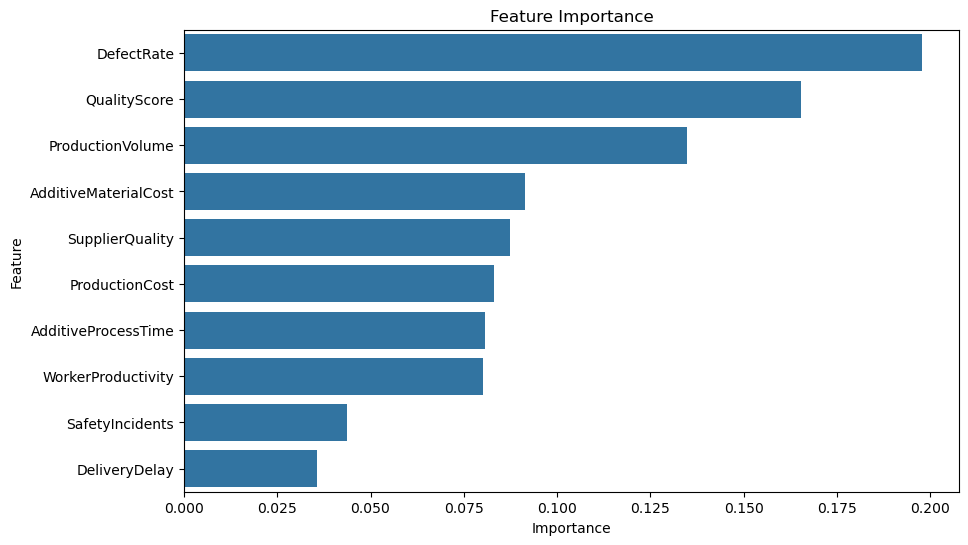

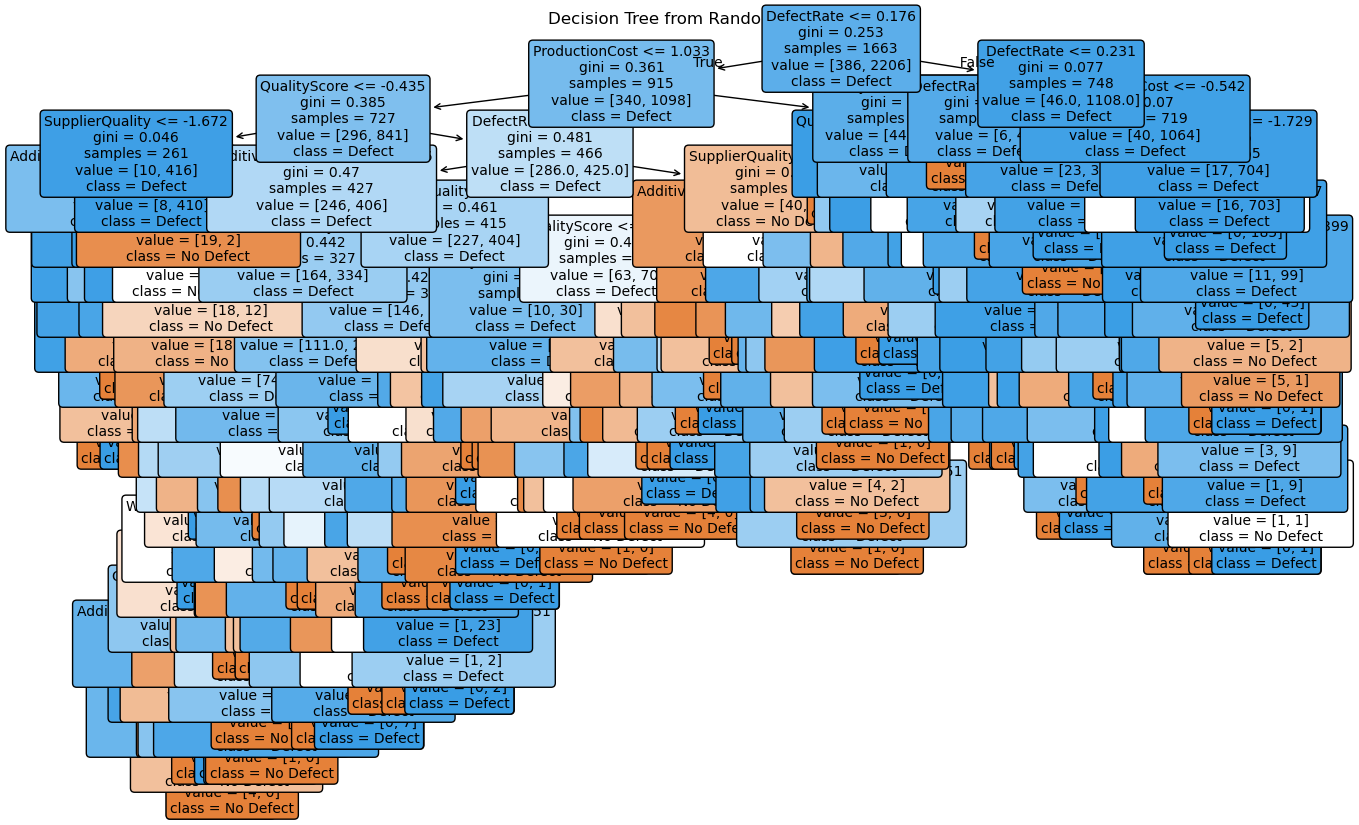

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame
df = pd.read_csv('manufacturing_defect_dataset.csv', encoding='ascii')

# Define the feature columns
features = [
    'ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'DefectRate',
    'QualityScore', 'WorkerProductivity', 'SafetyIncidents', 'AdditiveProcessTime', 'AdditiveMaterialCost'
]

# Split the dataset into independent variables (features) and the target variable
X = df[features]
y = df['DefectStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Report:\n{report}')

# 1. Plot feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort and plot the feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

# 2. Plot the decision tree (using the first tree from the Random Forest)
# Extract the first tree from the Random Forest model
estimator = rf_model.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    estimator,
    filled=True,
    feature_names=X.columns,
    class_names=['No Defect', 'Defect'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset into a DataFrame
df = pd.read_csv('manufacturing_defect_dataset.csv', encoding='ascii')

# Define the feature columns and target column
features = ['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'DefectRate',
            'QualityScore', 'WorkerProductivity', 'SafetyIncidents', 'AdditiveProcessTime', 'AdditiveMaterialCost']
X = df[features]
y = df['DefectStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Data preprocessing
# Preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Use ColumnTransformer to apply preprocessing to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Build the pipeline: Preprocessor + RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 1: Use Cross-Validation to evaluate the model
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Step 2: Use RandomizedSearchCV for hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model_pipeline, param_distributions, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters from RandomizedSearchCV
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")

# Train the model with the best parameters
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 3: Save the trained model to a file
# joblib.dump(best_model, 'optimized_random_forest_model.joblib')
# print("Model saved successfully.")

Cross-Validation Accuracy: 0.8387 ± 0.0041
Best Parameters from RandomizedSearchCV: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None, 'classifier__bootstrap': False}
Accuracy on Test Set: 0.8287

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.30      0.36       102
           1       0.88      0.93      0.90       546

    accuracy                           0.83       648
   macro avg       0.66      0.62      0.63       648
weighted avg       0.81      0.83      0.82       648



# Predict/prevent machinery failures

Accuracy: 0.8425925925925926
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.84      1.00      0.91       546

    accuracy                           0.84       648
   macro avg       0.42      0.50      0.46       648
weighted avg       0.71      0.84      0.77       648



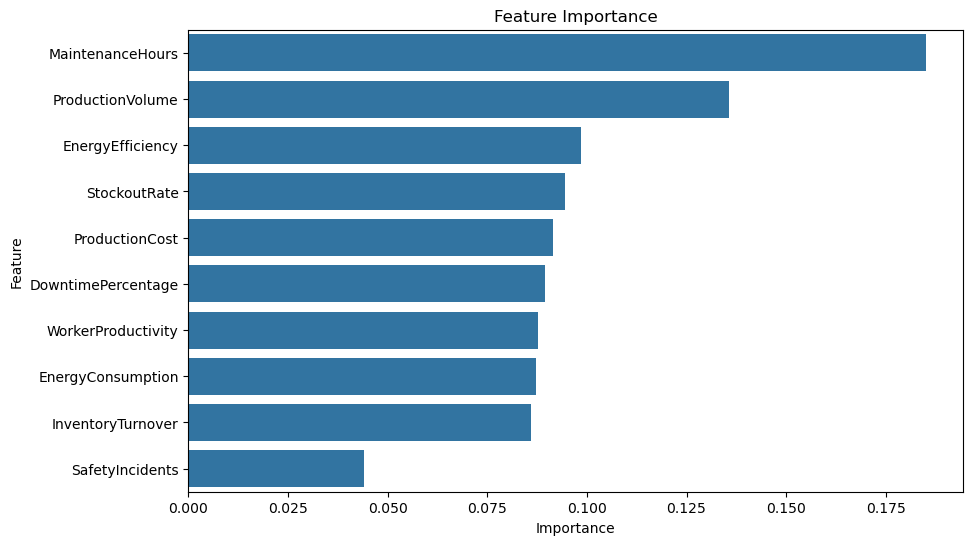

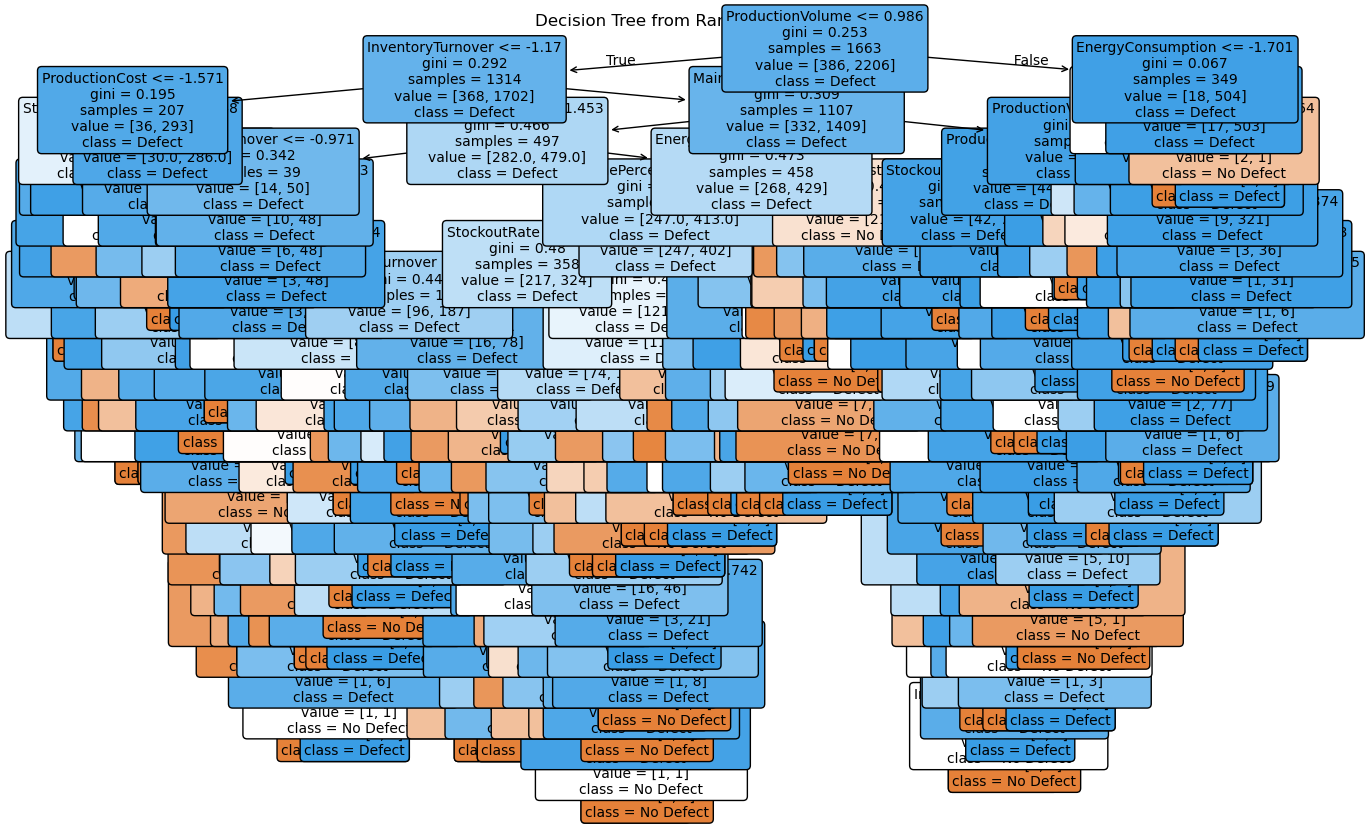

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame
df = pd.read_csv('manufacturing_defect_dataset.csv', encoding='ascii')

# Define the feature columns
features=['MaintenanceHours', 'DowntimePercentage', 'EnergyConsumption', 'EnergyEfficiency',
          'ProductionVolume', 'ProductionCost', 'InventoryTurnover', 'StockoutRate',
          'WorkerProductivity', 'SafetyIncidents']

# Split the dataset into independent variables (features) and the target variable
X = df[features]
y = df['DefectStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Report:\n{report}')

# 1. Plot feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort and plot the feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

# 2. Plot the decision tree (using the first tree from the Random Forest)
# Extract the first tree from the Random Forest model
estimator = rf_model.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    estimator,
    filled=True,
    feature_names=X.columns,
    class_names=['No Defect', 'Defect'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset into a DataFrame
df = pd.read_csv('manufacturing_defect_dataset.csv', encoding='ascii')

# Define the feature columns and target column
features=['MaintenanceHours', 'DowntimePercentage', 'EnergyConsumption', 'EnergyEfficiency',
          'ProductionVolume', 'ProductionCost', 'InventoryTurnover', 'StockoutRate',
          'WorkerProductivity', 'SafetyIncidents']
X = df[features]
y = df['DefectStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Data preprocessing
# Preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Use ColumnTransformer to apply preprocessing to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Build the pipeline: Preprocessor + RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 1: Use Cross-Validation to evaluate the model
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Step 2: Use RandomizedSearchCV for hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model_pipeline, param_distributions, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters from RandomizedSearchCV
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")

# Train the model with the best parameters
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 3: Save the trained model to a file
# joblib.dump(best_model, 'optimized_random_forest_model.joblib')
# print("Model saved successfully.")

Cross-Validation Accuracy: 0.8376 ± 0.0092
Best Parameters from RandomizedSearchCV: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Accuracy on Test Set: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.02      0.04       102
           1       0.84      0.99      0.91       546

    accuracy                           0.84       648
   macro avg       0.59      0.51      0.47       648
weighted avg       0.76      0.84      0.77       648

